<a href="https://colab.research.google.com/github/afrinarazaman/Sentiment-Analysis-of-Bangla-Social-Media-Comments/blob/main/base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')

In [ ]:
df.head(2)

,comment,Category,Gender,comment react number,label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully


In [ ]:
df['label'].value_counts()

,count
label,
not bully,15340
troll,10462
sexual,8928
religious,7577
threat,1694


In [ ]:
df.describe()

,comment react number
count,43998.000000
mean,1.180849
std,6.671492
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,428.000000


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Female,29950
Male,14051


## Exploratory Data Analysis

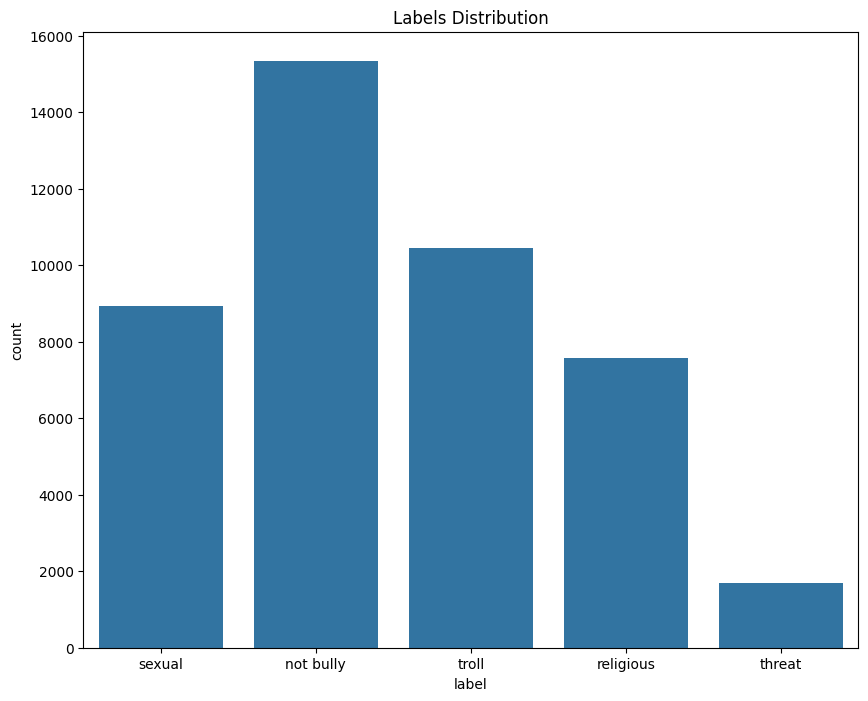

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='label')
plt.title('Labels Distribution')
plt.show()

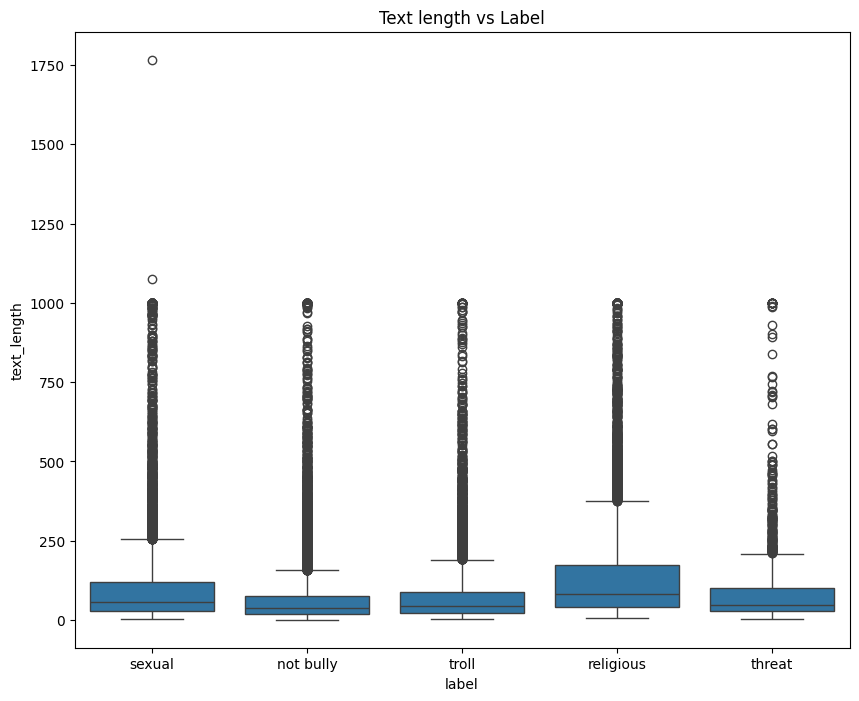

In [ ]:
df['text_length'] = df['comment'].apply(len)
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='label', y='text_length')
plt.title('Text length vs Label')
plt.show()

In [ ]:
from collections import Counter

for label in df['label'].unique():
  filtered_comment = df[df['label']==label]['comment']
  words = ' '.join(filtered_comment).split()
  print("Ten most common words", Counter(words).most_common(10))

Ten most common words [('না', 2254), ('করে', 1684), ('কি', 1492), ('বিশ্বাস', 1318), ('মাগি', 1268), ('তুই', 1187), ('আর', 1185), ('এই', 1117), ('তো', 1050), ('তোর', 1034)]
Ten most common words [('না', 1745), ('করে', 1612), ('আল্লাহ', 1575), ('ভাই', 1438), ('আপনার', 1377), ('হিরো', 1335), ('আলম', 1293), ('এই', 1196), ('অনেক', 1174), ('কি', 1157)]
Ten most common words [('না', 2052), ('কি', 1645), ('করে', 1391), ('এই', 1216), ('আর', 1175), ('তো', 962), ('হিরো', 927), ('বিশ্বাস', 862), ('একটা', 820), ('তুই', 815)]
Ten most common words [('নাস্তিক', 4134), ('না', 2792), ('করে', 2309), ('বিশ্বাস', 2236), ('কি', 1789), ('আর', 1623), ('তুই', 1489), ('এই', 1472), ('আল্লাহ', 1419), ('তো', 1383)]
Ten most common words [('জুতা', 738), ('না', 318), ('করে', 304), ('এই', 291), ('থেকে', 231), ('করা', 228), ('তোর', 208), ('কে', 198), ('তুই', 195), ('আর', 187)]


In [ ]:
with open('/content/drive/MyDrive/stopwords-bn.txt', encoding='utf-8') as f:
  stopwords = f.read()

print(stopwords.split('\n'))

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

In [ ]:
from collections import Counter

for label in df['label'].unique():
  words = ' '.join(df[df['label'] == label]['comment']).split()
  words = [w for w in words if w not in stopwords]
  print("Ten most common words", Counter(words).most_common(10))


Ten most common words [('বিশ্বাস', 1318), ('মাগি', 1268), ('তুই', 1187), ('তোর', 1034), ('একটা', 759), ('কথা', 739), ('সাফা', 687), ('ক্ষমা', 603), ('আল্লাহ', 574), ('খানকি', 572)]
Ten most common words [('আল্লাহ', 1575), ('ভাই', 1438), ('হিরো', 1335), ('আলম', 1293), ('সুন্দর', 1060), ('ভালো', 951), ('কথা', 927), ('দান', 875), ('আপনাকে', 873), ('ধন্যবাদ', 748)]
Ten most common words [('হিরো', 927), ('বিশ্বাস', 862), ('একটা', 820), ('তুই', 815), ('কথা', 746), ('আলম', 676), ('পাগল', 637), ('তোর', 566), ('মানুষ', 492), ('জায়েদ', 450)]
Ten most common words [('নাস্তিক', 4134), ('বিশ্বাস', 2236), ('তুই', 1489), ('আল্লাহ', 1419), ('কথা', 1156), ('সাফা', 1072), ('নাস্তিকের', 1029), ('তোর', 907), ('ক্ষমা', 824), ('একটা', 799)]
Ten most common words [('জুতা', 738), ('তোর', 208), ('তুই', 195), ('নাস্তিক', 185), ('বিশ্বাস', 158), ('দিয়ে', 148), ('জুতার', 146), ('কথা', 136), ('সাফা', 116), ('একটা', 109)]


In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
print(f"{train_df['label'].value_counts()}'\n'{test_df['label'].value_counts()}")

label
not bully    12272
troll         8369
sexual        7142
religious     6062
threat        1355
Name: count, dtype: int64'
'label
not bully    3068
troll        2093
sexual       1786
religious    1515
threat        339
Name: count, dtype: int64


In [ ]:
!pip install swifter emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 48.4 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=78d1b1f4e2ac50585a7843791883f3e1898bec32314de61580d09b9244ca807e
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


In [ ]:
import re
import unicodedata
import emoji
import pandas as pd
import swifter

eng_remove = re.compile(r'[A-Za-z0-9]')
url_mention_hastag_remove = re.compile(r'http\S+|www\S+|@\w+|#\w+')
newline_remove = re.compile(r'[\n\r\t]')
space_remove = re.compile(r'\s+')
non_bangla_remove = re.compile(r'[^\u0980-\u09FF ]')

def preprocess_base_model(text):

    if pd.isnull(text):
        return ""

    text = emoji.replace_emoji(text, replace='')
    text = eng_remove.sub('', text)
    text = url_mention_hastag_remove.sub('', text)
    text = newline_remove.sub('', text)
    text = non_bangla_remove.sub('', text)
    text = space_remove.sub(' ', text).strip()
    text = unicodedata.normalize('NFKC', text)

    words = [w for w in text.split() if w not in stopwords]

    return ' '.join(words)


train_df['comment'] = train_df['comment'].swifter.apply(preprocess_base_model)
test_df['comment'] = test_df['comment'].swifter.apply(preprocess_base_model)

Pandas Apply:   0%|          | 0/35200 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/8801 [00:00<?, ?it/s]

In [ ]:
train_df['label'].value_counts()

,count
label,
not bully,12272
troll,8369
sexual,7142
religious,6062
threat,1355


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer

def prepare_data(train_df, test_df):

  sampling_strategy = {
      'threat': 6000,
      'religious': 7000
  }

  x_train = train_df['comment']
  y_train = train_df['label']

  ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
  x_train_ros, y_train_ros = ros.fit_resample(x_train.values.reshape(-1, 1), y_train)
  x_train_texts = x_train_ros.ravel()

  vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
  x_train_vec = vectorizer.fit_transform(x_train_texts)
  x_test_vec = vectorizer.transform(test_df['comment'])

  return x_train_vec, y_train_ros, x_test_vec, test_df['label'], vectorizer


In [ ]:
x_train, y_train, x_test, y_test, vectorizer = prepare_data(train_df, test_df)

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 11.9 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


def objective(trial, x_train, y_train, x_test, y_test):
  params = {
      'n_estimators': trial.suggest_int('n_estimators', 100, 500),
      'max_depth': trial.suggest_int('max_depth', 10, 50),
      'class_weight': trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample']),
      'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
      'min_samples_split': trial.suggest_int('min_samples_split', 2, 10)
  }

  model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
  model.fit(x_train, y_train)

  predictions = model.predict(x_test)
  f1 = f1_score(y_test, predictions, average='weighted')

  return f1


In [ ]:
def tune_hyperparameter(x_train, y_train, x_test, y_test, trial=20):
  study = optuna.create_study(direction='maximize')
  study.optimize(
      lambda t: objective(t, x_train, y_train, x_test, y_test),
      n_trials=trial
  )

  return study.best_params

In [ ]:
best_params = tune_hyperparameter(x_train, y_train, x_test, y_test)
print(best_params)

[I 2025-05-20 06:51:38,595] A new study created in memory with name: no-name-4163b9b6-d6ee-4805-a37d-633dc0cb9479
[I 2025-05-20 06:51:46,798] Trial 0 finished with value: 0.5144690756479562 and parameters: {'n_estimators': 267, 'max_depth': 50, 'class_weight': 'balanced_subsample', 'max_features': 'log2', 'min_samples_split': 8}. Best is trial 0 with value: 0.5144690756479562.
[I 2025-05-20 06:51:55,179] Trial 1 finished with value: 0.5048097327356936 and parameters: {'n_estimators': 457, 'max_depth': 36, 'class_weight': 'balanced', 'max_features': 'log2', 'min_samples_split': 7}. Best is trial 0 with value: 0.5144690756479562.
[I 2025-05-20 06:52:02,219] Trial 2 finished with value: 0.5031693531893549 and parameters: {'n_estimators': 132, 'max_depth': 42, 'class_weight': 'balanced', 'max_features': 'log2', 'min_samples_split': 2}. Best is trial 0 with value: 0.5144690756479562.
[I 2025-05-20 06:52:07,591] Trial 3 finished with value: 0.5081427890063962 and parameters: {'n_estimators':

{'n_estimators': 267, 'max_depth': 50, 'class_weight': 'balanced_subsample', 'max_features': 'log2', 'min_samples_split': 8}


In [ ]:
from sklearn.metrics import classification_report

final_model = RandomForestClassifier(**best_params, n_jobs=-1, random_state=42)
final_model.fit(x_train, y_train)

y_pred = final_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   not bully       0.74      0.56      0.64      3068
   religious       0.47      0.49      0.48      1515
      sexual       0.54      0.35      0.43      1786
      threat       0.18      0.23      0.20       339
       troll       0.40      0.62      0.49      2093

    accuracy                           0.51      8801
   macro avg       0.47      0.45      0.45      8801
weighted avg       0.55      0.51      0.51      8801

